<a href="https://colab.research.google.com/github/haraharaman/learning/blob/main/1%E7%AB%A0_%E3%82%A6%E3%82%A7%E3%83%96%E3%81%8B%E3%82%89%E3%81%AE%E6%B3%A8%E6%96%87%E6%95%B0%E3%82%92%E5%88%86%E6%9E%90%E3%81%99%E3%82%8B%EF%BC%91%EF%BC%90%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os 
os.chdir('/content/drive/MyDrive/勉強/Colab Notebooks/100knock-data_analytics/1章') #ここを変更。

# １章 ウェブの注文数を分析する１０本ノック

ここでは、ある企業のECサイトでの商品の注文数の推移を分析していきます。  
データの属性を理解し、分析をするためにデータを加工した後、  
データの可視化を行うことで問題を発見していくプロセスを学びます。

### ノック１：データを読み込んでみよう

In [3]:
import pandas as pd

In [4]:
customers = pd.read_csv("customer_master.csv")
customers.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [5]:
items = pd.read_csv("item_master.csv")
items.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [6]:
transaction1 = pd.read_csv("transaction_1.csv")
transaction2 = pd.read_csv("transaction_2.csv")
transaction1.head()
transaction2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [7]:
transactiond1 = pd.read_csv("transaction_detail_1.csv")
transactiond2 = pd.read_csv("transaction_detail_2.csv")
transactiond1.head()
transactiond2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


### ノック２：データを結合(ユニオン)してみよう

In [8]:
transactions = pd.concat([transaction1,transaction2],ignore_index=True)
transactions.head()
print(len(transaction1),len(transaction2),len(transactions))

5000 1786 6786


In [9]:
transactiond = pd.concat([transactiond1,transactiond2],ignore_index=True)
print(len(transactiond1),len(transactiond2),len(transactiond))

5000 2144 7144


### ノック３：売上データ同士を結合(ジョイン)してみよう

1.   リスト項目
2.   リスト項目



In [10]:
join_data = pd.merge(transactions[["transaction_id","customer_id","payment_date"]], transactiond)
join_data.head()

,transaction_id,customer_id,payment_date,detail_id,item_id,quantity
0,T0000000113,PL563502,2019-02-01 01:36:57,0,S005,1
1,T0000000114,HD678019,2019-02-01 01:37:23,1,S001,1
2,T0000000115,HD298120,2019-02-01 02:34:19,2,S003,1
3,T0000000116,IK452215,2019-02-01 02:47:23,3,S005,1
4,T0000000117,PL542865,2019-02-01 04:33:46,4,S002,2


### ノック４：マスタデータを結合(ジョイン)してみよう

In [11]:
join_data = pd.merge(join_data, customers)
join_data = pd.merge(join_data, items)
join_data.head()

,transaction_id,customer_id,payment_date,detail_id,item_id,quantity,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,T0000000113,PL563502,2019-02-01 01:36:57,0,S005,1,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,T0000003439,HD298120,2019-04-30 02:39:00,3494,S005,1,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-E,210000
2,T0000003439,HD298120,2019-04-30 02:39:00,3495,S005,1,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-E,210000
3,T0000000116,IK452215,2019-02-01 02:47:23,3,S005,1,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,T0000000832,IK452215,2019-02-19 19:48:24,753,S005,1,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000


### ノック5：必要なデータ列を作ろう

In [12]:
join_data["price"] = join_data["quantity"]*join_data["item_price"]
print(join_data["price"])

0       210000
1       210000
2       210000
3       210000
4       210000
         ...  
7139    120000
7140    120000
7141    240000
7142    120000
7143    120000
Name: price, Length: 7144, dtype: int64


### ノック6：データ検算をしよう

In [13]:
join_data["price"].sum()

971135000

In [14]:
transactions["price"].sum()

971135000

### ノック7：各種統計量を把握しよう

In [15]:
join_data.isnull().sum()

transaction_id        0
customer_id           0
payment_date          0
detail_id             0
item_id               0
quantity              0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [16]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


### ノック8：月別でデータを集計してみよう

In [17]:
#データ型をdatetimeに変換
join_data.dtypes
join_data["registration_date"] = pd.to_datetime(join_data["registration_date"])
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data.dtypes

transaction_id                object
customer_id                   object
payment_date          datetime64[ns]
detail_id                      int64
item_id                       object
quantity                       int64
customer_name                 object
registration_date     datetime64[ns]
customer_name_kana            object
email                         object
gender                        object
age                            int64
birth                         object
pref                          object
item_name                     object
item_price                     int64
price                          int64
dtype: object

In [18]:
#年月に変換
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data["payment_month"].head()

0    201902
1    201904
2    201904
3    201902
4    201902
Name: payment_month, dtype: object

In [19]:
join_data.groupby("payment_month").describe()["price"]

,count,mean,std,min,25%,50%,75%,max
payment_month,,,,,,,,
201902,1164.0,137615.979381,68742.915481,50000.0,85000.0,120000.0,210000.0,420000.0
201903,1181.0,135791.701948,69004.941844,50000.0,85000.0,120000.0,210000.0,420000.0
201904,1184.0,135565.878378,69163.709044,50000.0,85000.0,120000.0,210000.0,420000.0
201905,1170.0,132837.606838,68325.812982,50000.0,85000.0,120000.0,210000.0,420000.0
201906,1202.0,136464.226290,67280.793796,50000.0,85000.0,120000.0,210000.0,420000.0
201907,1243.0,137264.682220,68590.008800,50000.0,85000.0,120000.0,210000.0,420000.0


### ノック9：月別、商品別でデータを集計してみよう

In [26]:
join_data.groupby(["payment_month","item_name"]).sum()[["price","quantity"]]

<ipython-input-26-ca499f2db8a7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  join_data.groupby(["payment_month","item_name"]).sum()[["price","quantity"]]


price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [27]:
pd.pivot_table(join_data, index='item_name', columns='payment_month',values=["price","quantity"],aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

### ノック10：商品別の売上推移を可視化してみよう

1.   リスト項目
2.   リスト項目



In [65]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name',values=["price"],aggfunc='sum')

<Axes: xlabel='payment_month'>

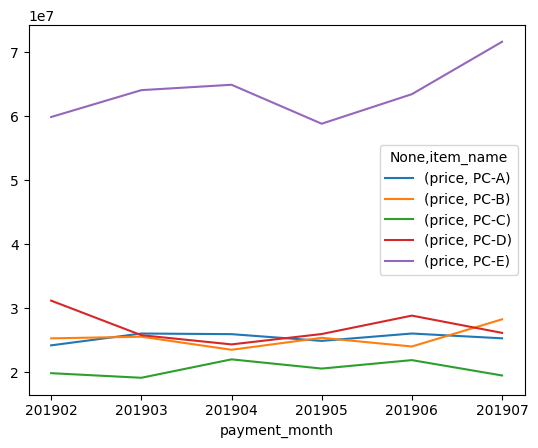

In [66]:
graph_data.plot()
#import matplotlib.pyplot as plt
#plt.plot(list(graph_data.index),graph_data)
#plt.legend()